In [2]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import norm

import utils

sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

In [3]:
path = 'C:\\Users\\kancy\\Desktop\\python_test\\project\\fma_metadata\\'
tracks = utils.load(path+'tracks.csv')
genres = utils.load(path+'genres.csv')
features = utils.load(path+'features.csv')
echonest = utils.load(path+'echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

C:\Users\kancy\Desktop\python_test\project\fma\project_files\utils.py:213: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [4]:
subset = tracks['set', 'subset'] == 'small'
small_tracks = tracks[subset]
small_tracks.columns.values
#small_tracks['track', 'genre_top']


array([('album', 'comments'), ('album', 'date_created'),
       ('album', 'date_released'), ('album', 'engineer'),
       ('album', 'favorites'), ('album', 'id'), ('album', 'information'),
       ('album', 'listens'), ('album', 'producer'), ('album', 'tags'),
       ('album', 'title'), ('album', 'tracks'), ('album', 'type'),
       ('artist', 'active_year_begin'), ('artist', 'active_year_end'),
       ('artist', 'associated_labels'), ('artist', 'bio'),
       ('artist', 'comments'), ('artist', 'date_created'),
       ('artist', 'favorites'), ('artist', 'id'), ('artist', 'latitude'),
       ('artist', 'location'), ('artist', 'longitude'),
       ('artist', 'members'), ('artist', 'name'),
       ('artist', 'related_projects'), ('artist', 'tags'),
       ('artist', 'website'), ('artist', 'wikipedia_page'),
       ('set', 'split'), ('set', 'subset'), ('track', 'bit_rate'),
       ('track', 'comments'), ('track', 'composer'),
       ('track', 'date_created'), ('track', 'date_recorded'),
   

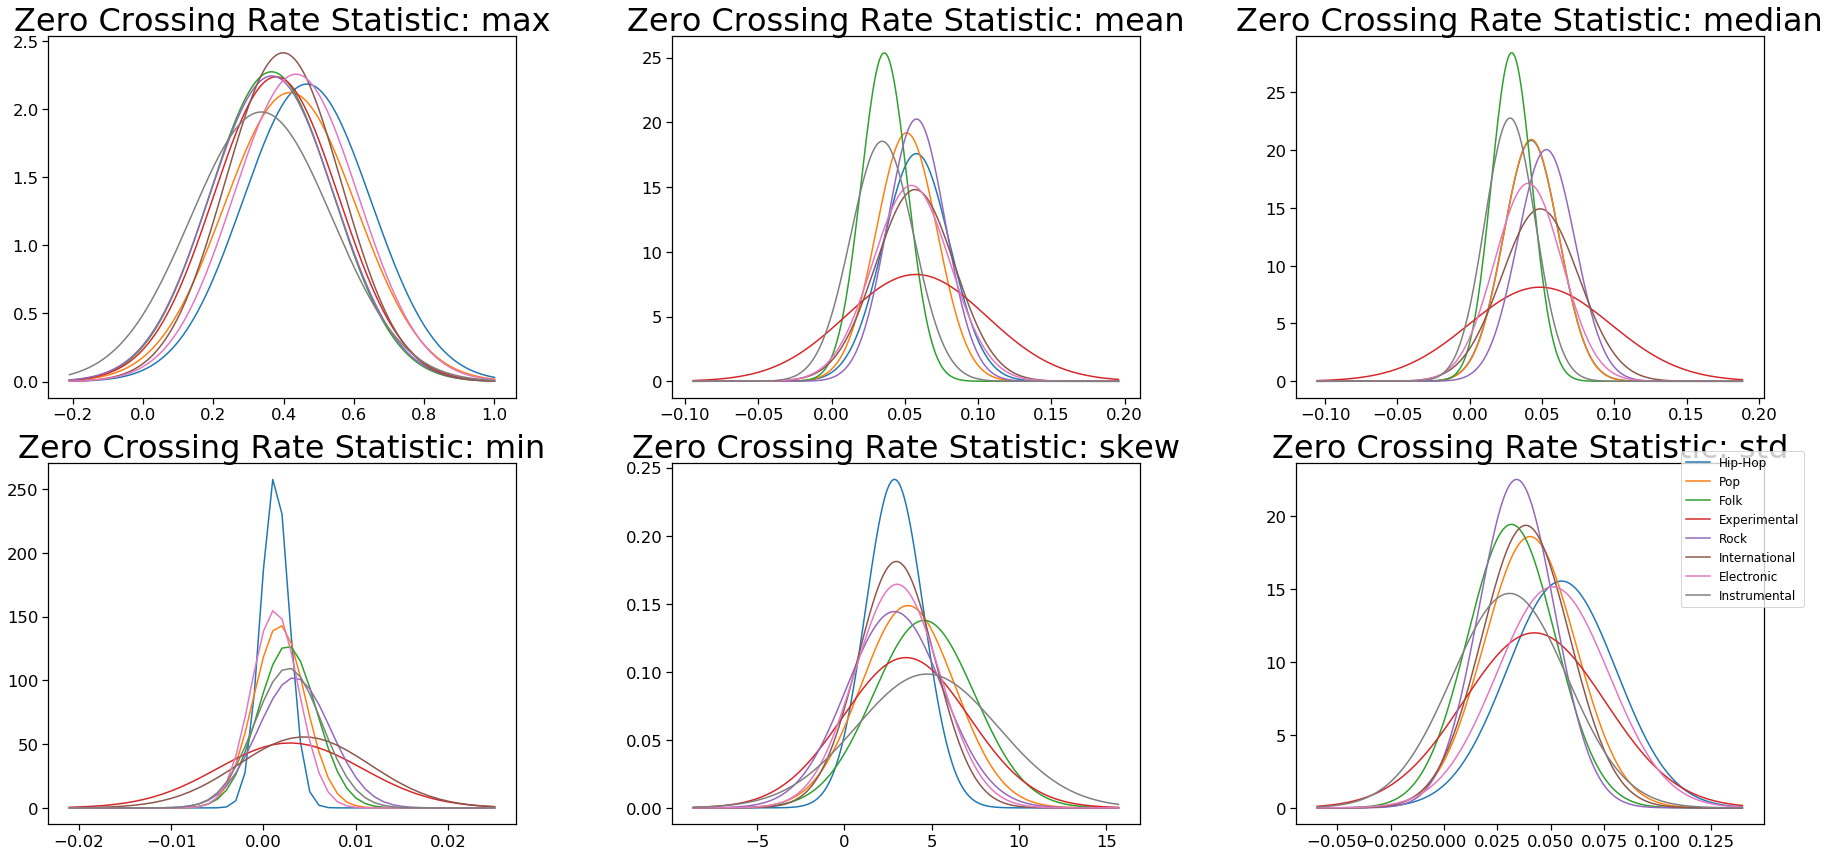

In [13]:
top_genres =small_tracks['track', 'genre_top'].unique() 

j=0
zcr_feats = ['max', 'mean', 'median', 'min', 'skew', 'std']
plt.figure(figsize=(26, 12))

for f in zcr_feats:
    means = []
    std = []
    for g in top_genres:
        g_subset = small_tracks['track', 'genre_top'] == g
        g_tracks = small_tracks[g_subset]
        
        zcr = features['zcr', f, '01'][g_tracks.index.values]    
        means.append(np.mean(zcr))
        std.append(np.std(zcr))

    mean_of_means = np.mean(means)
    max_std = np.max(std)
    x_axis = np.arange(mean_of_means-max_std*3, mean_of_means+max_std*3, 0.001)
    
    plt.subplot(2,3,j+1)
    for i in range(len(means)):
        zcr_dis= norm.pdf(x_axis,means[i],std[i])
        x = plt.plot(x_axis, zcr_dis)
    #plt.legend(top_genres)
    plt.title('Zero Crossing Rate Statistic: '+f, fontsize = 32)
    j+=1
plt.legend(top_genres, bbox_to_anchor=(1.1, 1.05), fontsize = 12)
plt.tight_layout()